<a href="https://colab.research.google.com/github/anderrow/DataScience/blob/master/AIRBNB_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

He decidido utilizar el mismo dataframe que nos proporcionasteis de AIRBNB por que me pareció interesante en su momento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder() #Instantiating the encoder
s_sc = StandardScaler()

path = '/content/drive/MyDrive/1. Software/Machine Learning/airbn_data.csv'

df = pd.read_csv(path)

# Data visualisation and cleansing



* Dirías que este Dataset está limpio? Se puede usar para entrenar un modelo?

* En caso que no, ¿qué técnicas de Data Cleaning necesita?

* ¿Borrarías alguna columna?

* ¿Cuál es nuestro target variable?

* Qué columnas necesitan Encoding? Y Scaling? ¡Aplica estas técnicas donde sea necesario!


---

1.  El dataset no está limpio, se podrá utilizar para entrenar un modelo correctamente una vez sea depurado y sus datos normalizados.
2. Manejo de valores inexistententes (NaN values),
  Identificación y correción de Errores,
  Transformación de datos (variables categóricas)
  Eliminación de Outliers,
  Normalización y Estandarización
3. Sí, todas las que no tengan relevancia para deducir el precio, así como el name, el id, el host_id y el host_name. Hay otras columnas que podrían tener relevancia (latitude,longitude) si medimos, por ejemplo, que tan cerca están del centro, una estación de metro o otro tipo de casuisticas, pero creo que por si solas carecen de relevancia así que también las he eliminado.
4. price
5. Encoding es necesario para las columnas: neighbourhood_group, neighbourhood.
 Scaling será aplicado a todas las columnas para que tengan una escala común y ninguna sea tomada en más consideración que otra.






In [ ]:
df.sample(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35047,27785672,Bushwick Art collective bedroom B,3635302,Adam,Brooklyn,Bushwick,40.7052,-73.91888,Private room,90,2,14,2019-07-01,1.32,3,87


In [ ]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'latitude',
                      'last_review', 'longitude']) #Drop irrelevant columns

## Managing NaN Values

In [ ]:
df.isnull().any() #Check if there are any Nan values

,0
neighbourhood_group,False
neighbourhood,False
room_type,False
price,False
minimum_nights,False
number_of_reviews,False
reviews_per_month,True
calculated_host_listings_count,False
availability_365,False


In [ ]:
#Si reviews_per_month = Nan sustituimos por 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df['reviews_per_month'].isnull().any()

False

## Identifying and fixing errors

In [ ]:
df.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,4,188


In [ ]:
df = df[df['availability_365'] != 0] #If an apartment is available 0 days is irrelevant.

In [ ]:
(df['availability_365'] == 0).any()

False

## Data transformation

### Encoding

In [ ]:
# Transform the categorical variable into numbers
df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
df['room_type'] = le.fit_transform(df['room_type'])

<ipython-input-12-d9d7700be585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])
<ipython-input-12-d9d7700be585>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood'] = le.fit_transform(df['neighbourhood'])
<ipython-input-12-d9d7700be585>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
print(f"{df['neighbourhood_group'].unique()} \n{sorted(df['neighbourhood'].unique())}\n{df['room_type'].unique()}") #Ensure

[1 2 3 4 0] 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217]
[1 0 2

In [ ]:
df[df < 0].any() #Check for negative values

,0
neighbourhood_group,False
neighbourhood,False
room_type,False
price,False
minimum_nights,False
number_of_reviews,False
reviews_per_month,False
calculated_host_listings_count,False
availability_365,False


### Outliers removal

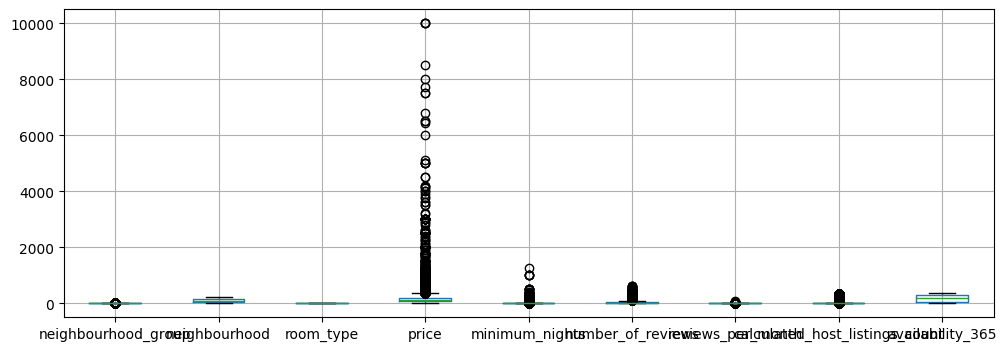

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))  # Create a figure and axes with specific size
df.boxplot(ax=ax)  # Pass the axes to the boxplot function
plt.show()

In [ ]:
len(df[df['availability_365'] > 365]) #ain't gonna be more than 365 days per year. Ensure

0

In [ ]:
columns_to_filter = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'reviews_per_month']

In [ ]:
print (f'Original length: {len(df)} \n')
for column in columns_to_filter:
  #Calculate Q1, Q3 and IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  #Define limits
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  df =  df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
  print(f'After removing outliers from {column} the new lenght is {len(df)} \n')

Original length: 31362 

After removing outliers from price the new lenght is 29501 

After removing outliers from minimum_nights the new lenght is 24153 

After removing outliers from number_of_reviews the new lenght is 22147 

After removing outliers from reviews_per_month the new lenght is 21456 

After removing outliers from reviews_per_month the new lenght is 21260 



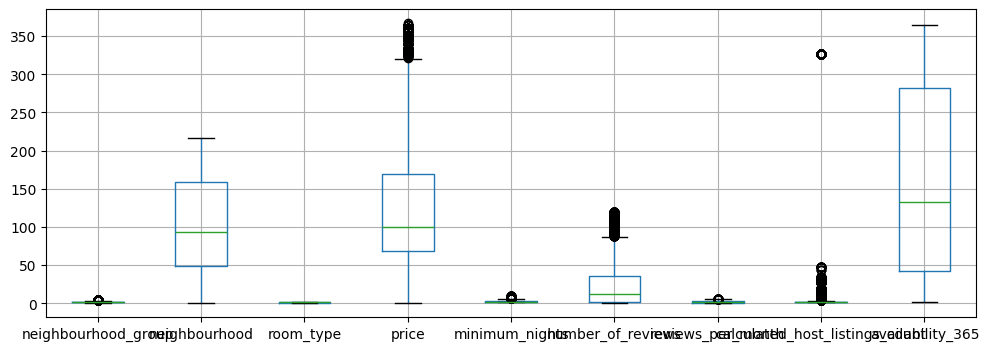

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))  # Create a figure and axes with specific size
df.boxplot(ax=ax)  # Pass the axes to the boxplot function
plt.show()

### Scaling

In [ ]:
s_sc.fit(df)

StandardScaler()

In [ ]:
df_scaled  = s_sc.transform(df) #checkear, creo que todavía no es un df

In [ ]:
type(df_scaled)

numpy.ndarray

In [ ]:
df[:] = df_scaled

<ipython-input-23-437c339b6f81>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.83281265  0.38139644  0.38139644 ... -0.83281265  0.38139644
  0.38139644]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = df_scaled
<ipython-input-23-437c339b6f81>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.10320691  0.38555213 -0.10483693 ... -1.08561505 -0.08997666
 -0.08997666]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[:] = df_scaled
<ipython-input-23-437c339b6f81>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.78658602 -1.01117992  0.78658602 ...  0.78658602  2.58435196
  0.78658602]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


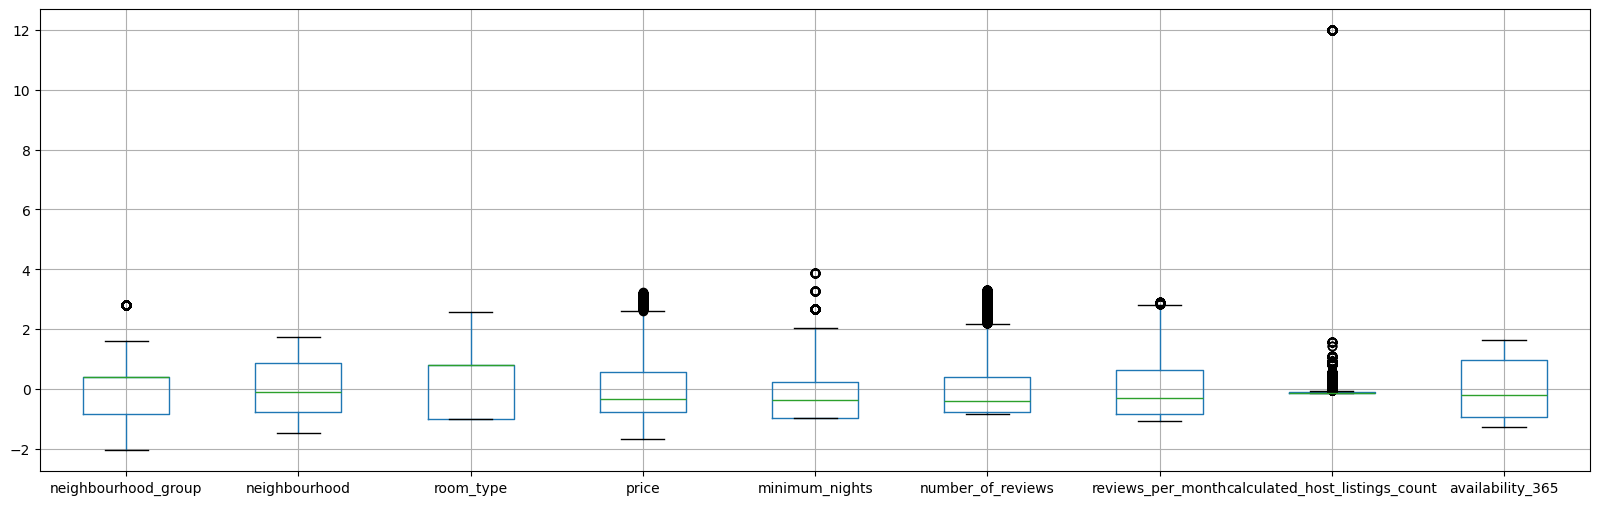

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))  # Create a figure and axes with specific size
df.boxplot(ax=ax)  # Pass the axes to the boxplot function
plt.show()

# Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

## Linear Regression

In [ ]:
#Define X and y

X = df.drop('price', axis=1) #Erase price column
y = df['price'] #Target variable

#Split the data. 70% for training and 30% for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linreg = LinearRegression() #Instance

linreg.fit(X_train, y_train) #Train model

linreg_y_pred= linreg.predict(X_test)  #Predict data from X_test

linreg_r2 = linreg.score(X_test, y_test) #Calculate R2 factor

linreg_coef = linreg.coef_ #coefficients Relationship between them and the target variable

linreg_mse = mean_squared_error(y_test, linreg_y_pred) #Calculated mean squared error


print(f"R2 Factor:{linreg_r2} \nCoefficients relationship: {linreg_coef} \n MSE: {linreg_mse}")

R2 Factor:0.3824948124852824 
Coefficients relationship: [ 0.02178018  0.10150356 -0.60524538 -0.02210857 -0.05981562 -0.06543907
  0.06570139  0.0837421 ] 
 MSE: 0.6208129429946923


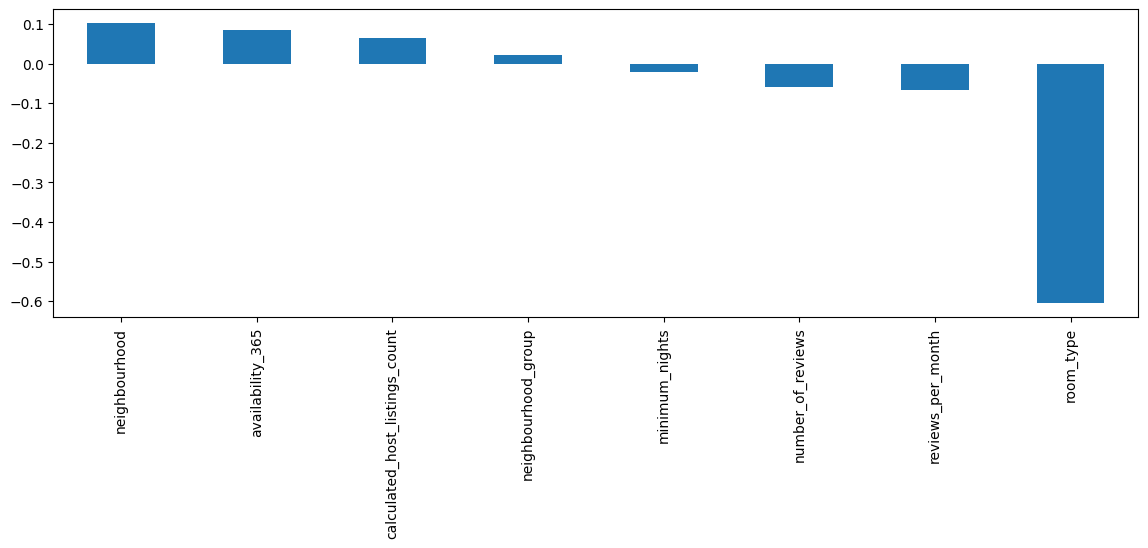

In [ ]:
coef_series = pd.Series(linreg_coef, index=X.columns).sort_values(ascending=False).plot.bar(figsize=(14, 4))

plt.show()

Podemos apreciar que el room type es la variable que mas afecta en nuestro modelo con diferencia, no obstante el r2 factor es solamente de 0.38 lo cual no es muy bueno. Veremos si podemos mejorarlo usando Lasso o Ridge.

## Lasso Regression

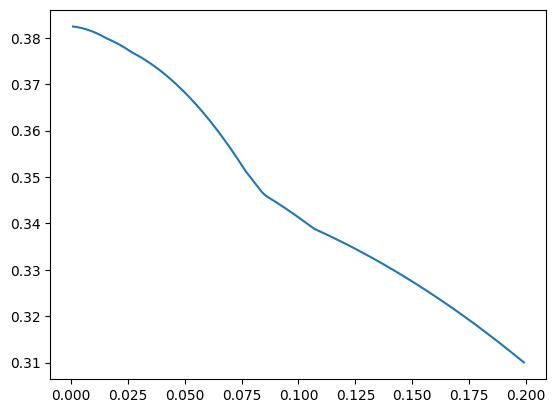

In [ ]:
#Find the better coefficient for Lasso (Visual)
alphas = np.arange(0.001, 0.2 , 0.001)
r2_list=[]

for i in alphas:
  model = Lasso(alpha=i)
  model.fit(X_train, y_train)

  r2_list.append(model.score(X_test, y_test))

plt.plot(alphas, r2_list)

In [ ]:
lasso_cv = LassoCV(n_alphas = 1000, random_state = 42).fit(X_train, y_train) #1000 thousand of samples of alpha
lasso_cv.alpha_ , lasso_cv.score(X_test, y_test), lasso_cv.coef_  #Influence of coeficients

(0.0005892709067106753,
 0.3824667165879704,
 array([ 0.02131238,  0.10097349, -0.60440379, -0.02127141, -0.05944668,
        -0.06479511,  0.06527223,  0.08317521]))

In [ ]:
lasso_cv_y_pred = lasso_cv.predict(X_test)
lasso_cv_mse = mean_squared_error(y_test, lasso_cv_y_pred)

lasso_cv_mse

0.620841189391725

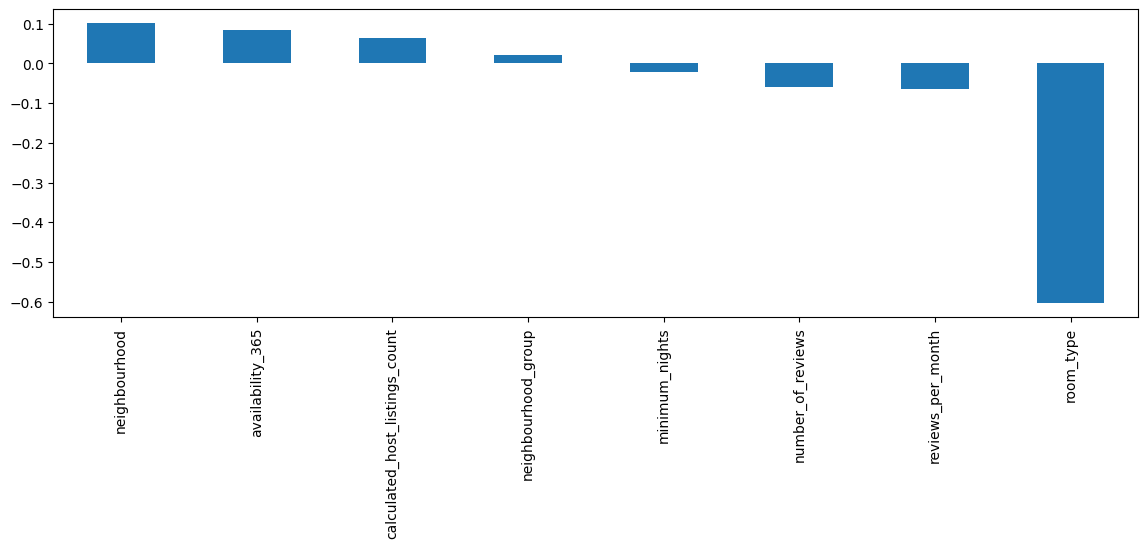

In [ ]:
coef_series = pd.Series(lasso_cv.coef_, index=X.columns).sort_values(ascending=False).plot.bar(figsize=(14, 4))

plt.show()

## Ridge Regression


Ya podemos ver a simple vista que este modelo no va a trabajar bien con Ridge por que los R2 factor son minúsculos

In [ ]:
alphas = np.logspace(-6, 6, 1000)

ridge_cv = RidgeCV(alphas=alphas).fit(X_train, y_train) #1000 thousand of samples of alpha

ridge_cv.alpha_ , ridge_cv.score(X_test, y_test), ridge_cv.coef_  #Influence of coeficients

(12.915496650148826,
 0.3824874445112084,
 array([ 0.02177192,  0.10143635, -0.60467088, -0.0219743 , -0.05974834,
        -0.06535895,  0.06569493,  0.08360222]))

In [ ]:
ridge_cv_y_pred = ridge_cv.predict(X_test)
ridge_cv_mse = mean_squared_error(y_test, ridge_cv_y_pred)

ridge_cv_mse

0.6208203504363806

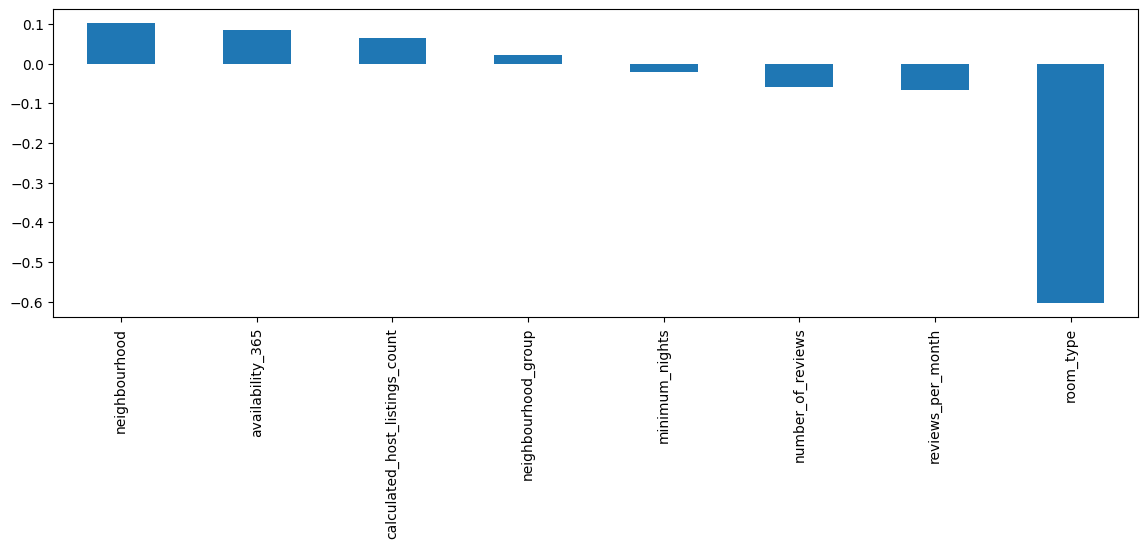

In [ ]:
coef_series = pd.Series(ridge_cv.coef_, index=X.columns).sort_values(ascending=False).plot.bar(figsize=(14, 4))

plt.show()

# DataFrame

In [ ]:
results = {
    "r2": [linreg_r2, lasso_cv.score(X_test, y_test), ridge_cv.score(X_test, y_test)],
    "MSE": [linreg_mse, lasso_cv_mse, ridge_cv_mse],
    "feature1": ['room_type', 'room_type', 'room_type'],
    "feature2": ['neighbourhood', 'neighbourhood', 'neighbourhood'],
    "hyperparameter": [None, lasso_cv.alpha_, ridge_cv.alpha_]  # hyperparameter
}

In [ ]:
# Set the index to model names
df_results = pd.DataFrame(results, index=["Linear", "Lasso", "Ridge"])

In [ ]:
df_results

,r2,MSE,feature1,feature2,hyperparameter
Linear,0.382495,0.620813,room_type,neighbourhood,NaN
Lasso,0.382467,0.620841,room_type,neighbourhood,0.000589
Ridge,0.382487,0.620820,room_type,neighbourhood,12.915497
